In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
ibex35 = yf.Ticker("^IBEX")

In [9]:
ibex35.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 16040.3,
 'open': 16050.2,
 'dayLow': 15977.2,
 'dayHigh': 16128.8,
 'regularMarketPreviousClose': 16040.3,
 'regularMarketOpen': 16050.2,
 'regularMarketDayLow': 15977.2,
 'regularMarketDayHigh': 16128.8,
 'volume': 130323878,
 'regularMarketVolume': 130323878,
 'averageVolume': 96411049,
 'averageVolume10days': 99135680,
 'averageDailyVolume10Day': 99135680,
 'bid': 16029.7,
 'ask': 16038.5,
 'bidSize': 0,
 'askSize': 0,
 'fiftyTwoWeekLow': 11295.0,
 'fiftyTwoWeekHigh': 16210.5,
 'allTimeHigh': 16210.5,
 'allTimeLow': 2814.1,
 'fiftyDayAverage': 15401.402,
 'twoHundredDayAverage': 14045.556,
 'currency': 'EUR',
 'tradeable': False,
 '52WeekChange': 35.81079,
 'quoteType': 'INDEX',
 'symbol': '^IBEX',
 'language': 'en-US',
 'region': 'US',
 'typeDisp': 'Index',
 'quoteSourceName': 'Delayed Quote',
 'triggerable': False,
 'customPriceAlertConfidence': 'LOW',
 'corporateActions': [],
 'regularMarketTime': 1761928519,
 'exchange': 'MCE

In [14]:
history = ibex35.history(period="max")
#history = ibex35.history(period="1d", start="2020-01-13", end = "2021-03-10")


In [ ]:
# Recommendations do not work for spanish market
ibex35.recommendations

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

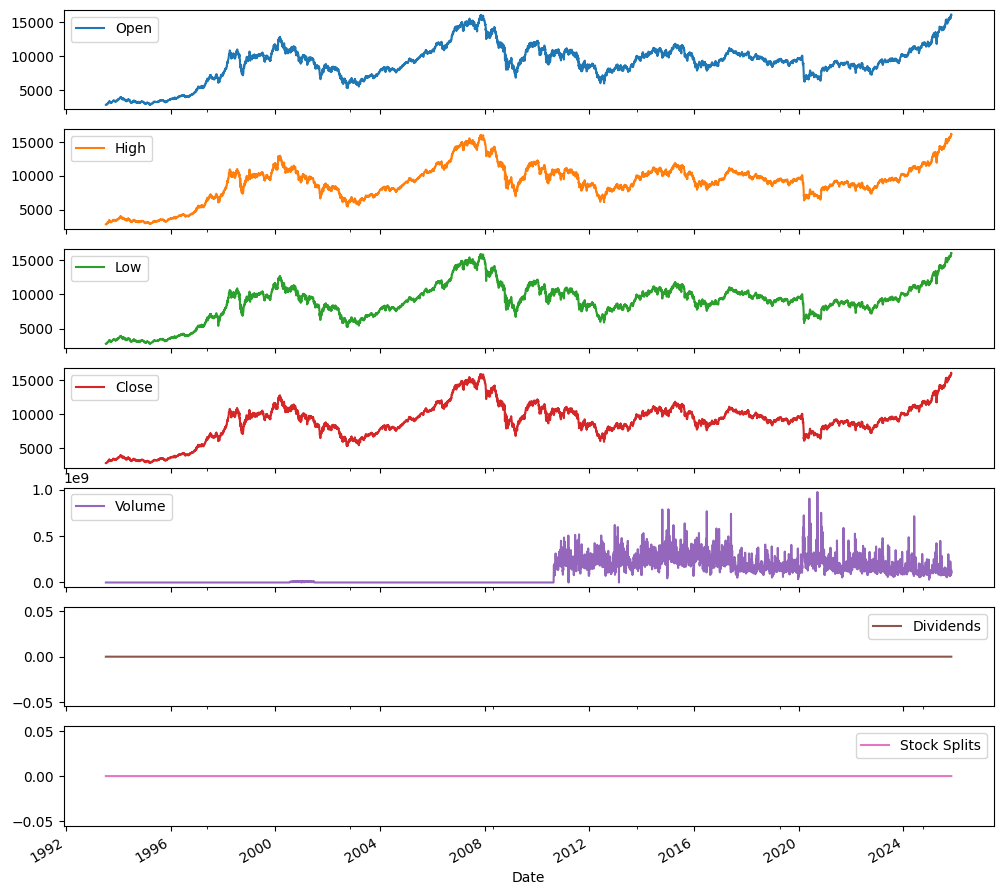

In [18]:
history.plot(kind="line", figsize=(12,12),subplots = True)

In [23]:
tickers = [
    "ACS.MC", "ACX.MC", "AENA.MC", "AMS.MC",
    "ANA.MC", "ANE.MC", "BBVA.MC", "BKT.MC",
    "CABK.MC", "CLNX.MC", "COL.MC", "ELE.MC",
    "ENG.MC", "FDR.MC", "FER.MC", "GRF.MC",
    "IAG.MC", "IBE.MC", "IDR.MC", "ITX.MC",
    "LOG.MC", "MAP.MC", "MEL.MC", "MRL.MC",
    "MTS.MC", "NTGY.MC", "PUIG.MC", "RED.MC",
    "REP.MC", "ROVI.MC", "SAB.MC", "SAN.MC",
    "SLR.MC", "TEF.MC", "UNI.MC"
]

In [24]:
data = yf.download(tickers, period="1mo", interval="1d")

print(data.head())

C:\Users\alexd\AppData\Local\Temp\ipykernel_16576\1778871847.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1mo", interval="1d")
[*********************100%***********************]  35 of 35 completed

Price           Close                                                      \
Ticker         ACS.MC ACX.MC    AENA.MC     AMS.MC      ANA.MC     ANE.MC   
Date                                                                        
2025-09-30  68.000000  11.10  23.270000  67.500000  170.899994  22.040001   
2025-10-01  67.800003  11.62  23.000000  67.900002  174.199997  22.520000   
2025-10-02  70.050003  11.58  22.820000  67.680000  173.699997  22.780001   
2025-10-03  69.800003  11.88  22.840000  67.800003  175.500000  23.740000   
2025-10-06  70.550003  11.88  22.690001  68.199997  178.399994  25.000000   

Price                                             ...   Volume           \
Ticker        BBVA.MC  BKT.MC CABK.MC    CLNX.MC  ...  NTGY.MC  PUIG.MC   
Date                                              ...                     
2025-09-30  16.340000  13.405   8.946  29.490000  ...   364801  1232717   
2025-10-01  16.375000  13.625   9.096  29.190001  ...   351234  1355077   
2025-10-

In [31]:
# Access a single company
acs = data['Adj Close']['ACS.MC']
print(acs.head())


KeyError: 'Adj Close'

In [32]:
# All columns from a single company
acs = data.xs('ACS.MC', axis=1, level=1)
print(acs.head())

Price           Close       High        Low       Open  Volume
Date                                                          
2025-09-30  68.000000  68.349998  66.599998  66.599998  298517
2025-10-01  67.800003  68.349998  67.199997  68.150002  351263
2025-10-02  70.050003  70.599998  69.199997  69.199997  432525
2025-10-03  69.800003  70.699997  69.500000  70.150002  211900
2025-10-06  70.550003  70.849998  69.349998  69.699997  228318


In [ ]:
# Get one variable
close_df = data['Close']
print(close_df.head())

In [ ]:
# Split into different dataframes
dfs = {ticker: data.xs(ticker, axis=1, level=1) for ticker in tickers}

# Example: Access ACS.MC data
print(dfs['ACS.MC'].head())


<Axes: xlabel='Date'>

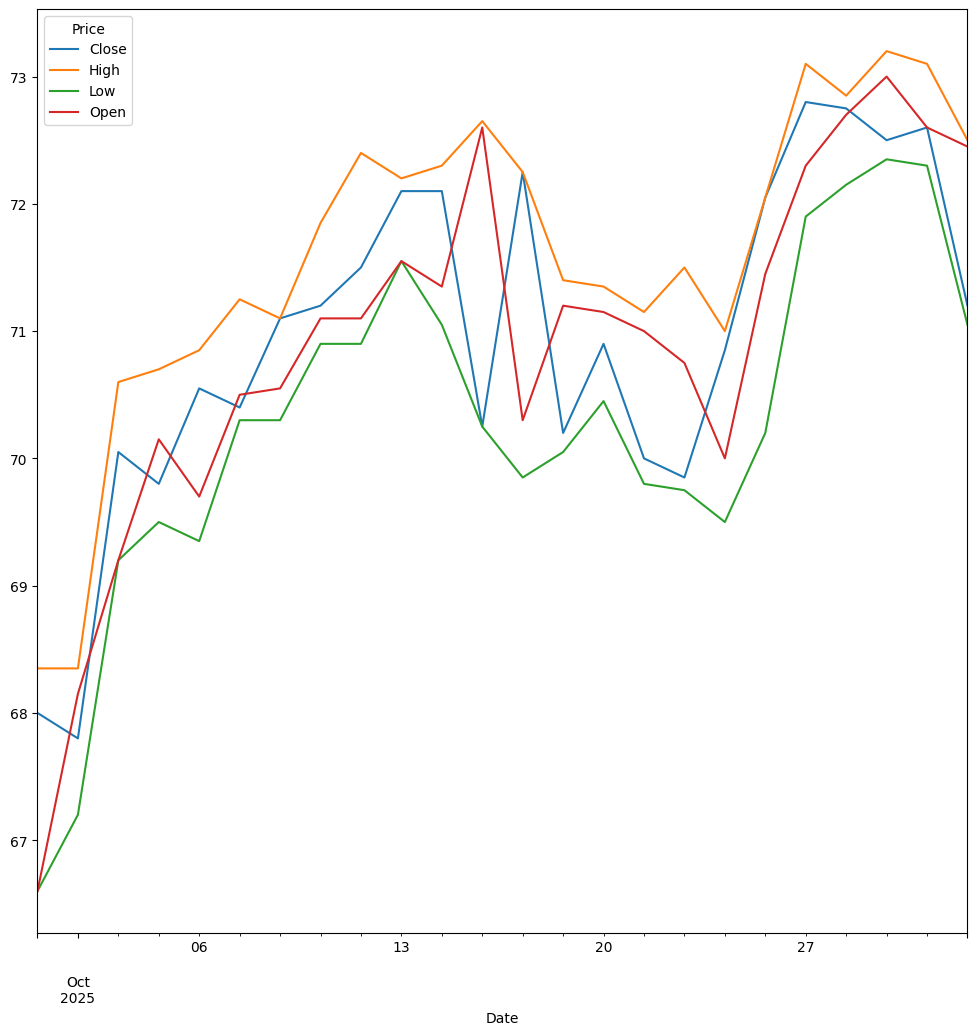

In [33]:
acs = acs.drop(columns=["Volume"])
acs.plot(kind= "line", figsize=(12,12), subplots=False)